# Projet Maths/Info:

## Preambule

In [1]:
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    

def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

### Question 1

*L'ensemble de niveau c est un compact*

Notons $E(c)$ l'ensemble de niveau c de f.\
On va montrer que $E(c)$ est fermé et borné, alors comme $E(c)$ est inclus dans $\mathbb{R}^2$ un espace vectoriel de dimension finie, on aura montré que c'est un compact.

Supposons que $\forall M \in \mathbb{R}, \exists x \in E(c), ||x||>M$ alors on peut construire une suite d'éléments de E(c) dont la norme tend vers +$\infty$ (en prenant comme minorants successifs M les éléments de $\mathbb{N}$).\
 Or par hypothèse, si $||(x, y)|| \rightarrow +\infty$ alors $f(x, y) \rightarrow +\infty$.\
 Donc cette suite ne peut pas exister (car c $\neq +\infty$), c'est absurde.\
Conclusion : $\exists M \in \mathbb{R}, \forall x \in E(c), ||x|| \leq M$.

Soit une suite convergente d'éléments de $E($c) notés $x_{n}, \forall n\in \mathbb{N}$ et de limite notée $x$, alors par définition, $\forall n \in \mathbb{N}, f(x_{n})=c$.\
Par hypothèse, la fonction $f$ est continue donc $f(x)=c$ par unicite de la limite , c'est-à-dire $x \in E(c)$.\
Conclusion : Par le théorème de caractérisation séquentielle des fermés $E(c)$ est un fermé.

### Question 2

*$\forall x = (x_{1}, x_{2}) \in \mathbb{R}, p(x_{1}, x_{2})$ est le projeté du vecteur $X=\begin{pmatrix} x_{1}-x_{10} \\ x_{2}-x_{20} \end{pmatrix}$ sur le vecteur unitaire orthogonal à $\nabla f(x0)$*\
On remarque en effet que :

$$
p(x_1, x_2) = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}). 
\\
p(x_1, x_2) = \begin{pmatrix} \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} * \frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} \end{pmatrix} \bullet \begin{pmatrix} x_{1}-x_{10} \\ x_{2}-x_{20} \end{pmatrix}
$$
Où $\begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$ est la rotation vectorielle vectorielle d'angle $-\frac{\pi}{2}$

### Question 3

On défini de même :
$$
p'(x_1, x_2) = \frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) +
\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}). 
$$
$p$ et $p'$ s'obtiennent donc de $x_{1}$ et $x_{2}$ en réalisant un changement de variable bijectif.\
On a en effet : 
$$
\begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} = x_{0} + p'*\frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} + p * \begin{pmatrix} \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} * \frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} \end{pmatrix}
$$
On peut donc définir $g : (p',p) \in \mathbb{R} \times \mathbb{R} \rightarrow \mathbb{R}$ telle que $\forall x = (x_{1}, x_{2}) \in \mathbb{R}^2, g(p'(x_{1}, x_{2}), p(x_{1},x_{2})) = f(x_{1}, x_{2}) - c$ une fonction continûment différentiable (car f l'est) et telle que la dérivéé partielle $\partial_1 g$ soit inversible sur un ouvert au voisinage de $(0,0)$ ($(p',p) = (0,0) \Leftrightarrow (x_{1},x_{2}) = x_{0}$) que l'on appelle W car par hypothèse $\nabla f$ ne s'annule pas sur un voisinage de $x_{0}$ donc $\nabla g$ ne s'annule pas sur un voisinage de $(0,0)$.\
Le théorème des fonctions implicites est donc applicable : 
$\exists U$ et $V$ voisinages de 0 et 0 et $\psi$ une fonction continûment différentiable, telle que
$$
\forall p \in V, \forall p' \in U, g(p',p) = 0 \Leftrightarrow p'= \psi(p)
$$
En réalisant le changement de variable dans l'autre sens, on exhibe un $\varepsilon > 0$ et une fonction (continûment différentiable) $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$ tels que dans un voisinage ouvert de $x_0,$ $f(x_1,x_2) = c \Leftrightarrow (x_1, x_2) = \gamma(t)$ où $t = p(x_1, x_2)$.

On prend :
$$
\gamma : \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix}  \mapsto x_{0} + \psi(p)*\frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} + p * \begin{pmatrix} \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} * \frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} \end{pmatrix}
$$

### Question 4

On calcule :
$$
\forall t \in \left]-\varepsilon, \varepsilon \right[,
\gamma '(t) = \psi'(t)*\frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} + \begin{pmatrix} \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} * \frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} \end{pmatrix}
$$
On factorise :
$$
\forall t \in \left]-\varepsilon, \varepsilon \right[,
\gamma '(t)  = \begin{pmatrix} \psi'(t) & 1 \\ -1 & \psi'(t) \end{pmatrix}*\frac{\nabla f(x_{0})}{||\nabla f(x_{0})||} 
$$
On voit alors que résoudre l'équation $\psi'(t) = 0$ revient à résoudre un système d'équation qui n'a pas de solutions car $\nabla f(x_{0})\neq 0$.
Donc $\forall t \in \left]-\varepsilon, \varepsilon \right[ , \psi '(t) \neq 0$

### Question 5

In [2]:
N = 100
eps = 10**(-10)

### Tache 1

In [3]:
def Newton(F, x0, y0, eps=eps, N=N):
    P = J(F)
   
    for i in range(N):
        x0 = np.float(x0)
        y0 = np.float(y0)
        INV = np.linalg.inv(P(x0,y0))
        a = np.array((x0,y0)) - np.dot(INV, F(x0,y0))  
        x, y = a[0], a[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps. ")

### Tache 2

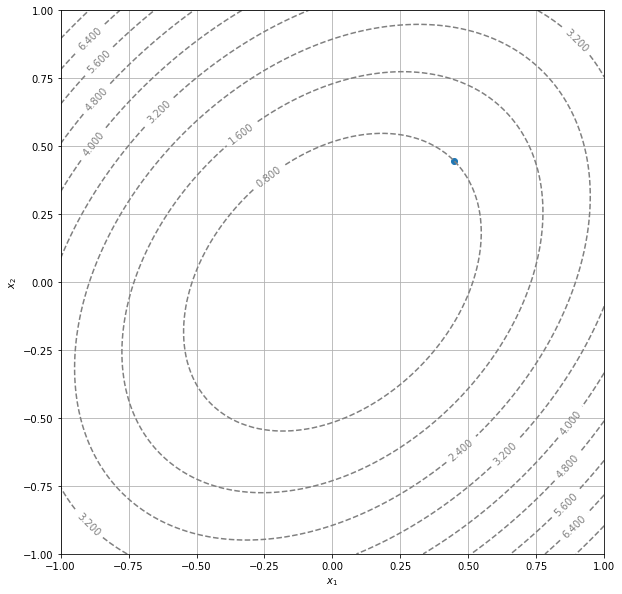

In [4]:
def gtask2 (x1, x2):
    g1 = f1(x1,x2) - 0.8
    g2 = x1 - x2
    return np.array([g1, g2])

display_contour(f1,
                x=np.linspace(-1.0, 1.0, 100), 
                y=np.linspace(-1.0, 1.0, 100),
                levels=10)

x,y = Newton(gtask2, 0.44, 0.44, eps, N) 
plt.scatter(x,y)

### Question 6

Notre technique d'approche consiste en les étapes suivantes illustrées dans le dessin:


    > calculer le gradient
    
    
    > le tourner de 90 degres vers la droite 
    
    
    > le normaliser et le multiplier par delta
    
    
    > utiliser Newton en partant du point (xint, yint) alors trouvé avec une fonction g redefinie a chaque implemantation de la boucle dont la première coordonnée test la condition "le point est sur la ligne de niveau" et dont la deuxième coordonnée test la condition "le point est sur le cercle de centre (x0,y0) et de rayon delta" 

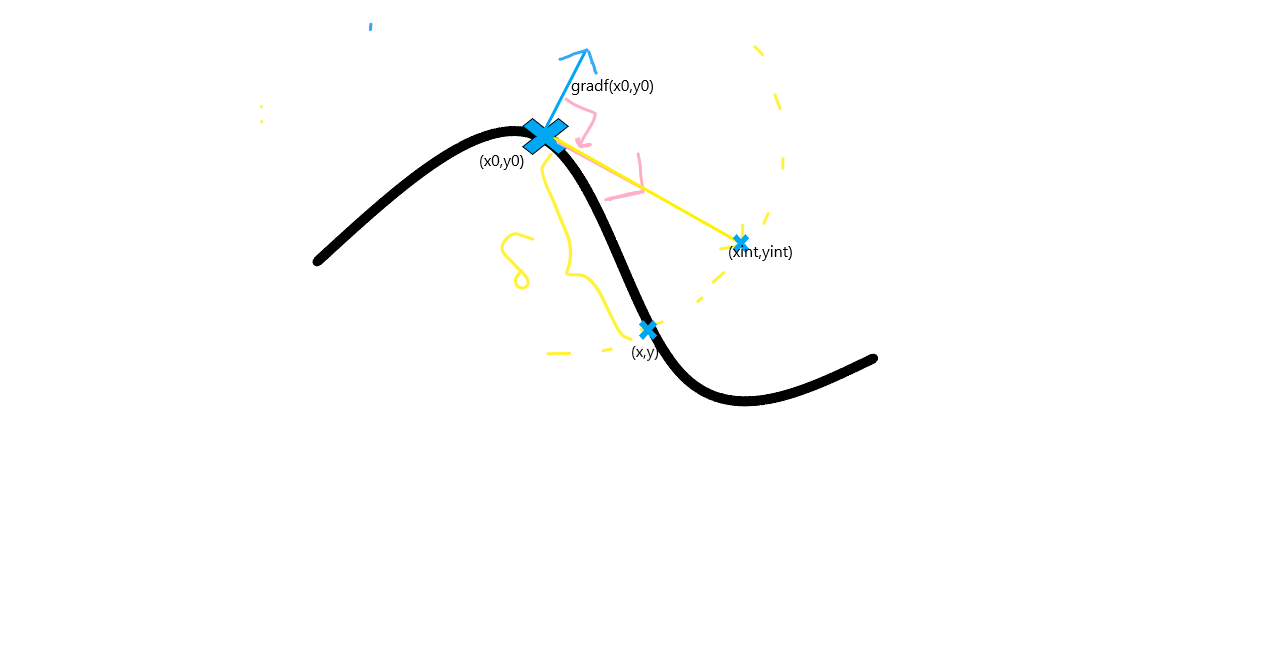

### Tache 3

In [95]:
def level_curve(f, x0, y0, delta=0.01, N = 100 , eps = eps):
    c = f(x0,y0)
    rot = np.array([[0,1],[-1,0]])
    gradf = grad(f)
    coord = np.zeros((2,N), dtype = float)

    for i in range(N):
        def g (x,y):
            g1 = f(x,y) - c
            g2= (x - x0)**2 + (y - y0)**2 - delta # equation de cercle
            return np.array([g1,g2])

        gradient = gradf(x0,y0)
        tan = np.dot(rot,gradient)
        tandelt = delta * (tan/np.linalg.norm(tan))
        xint, yint = np.array(x0+tandelt[0]), np.array(y0 + tandelt[1])
        x,y = Newton(g,xint,yint,eps,N)
        coord[0][i], coord[1][i] = x,y
        x0,y0 = x,y

    return coord


### Test de level_curve sur f1

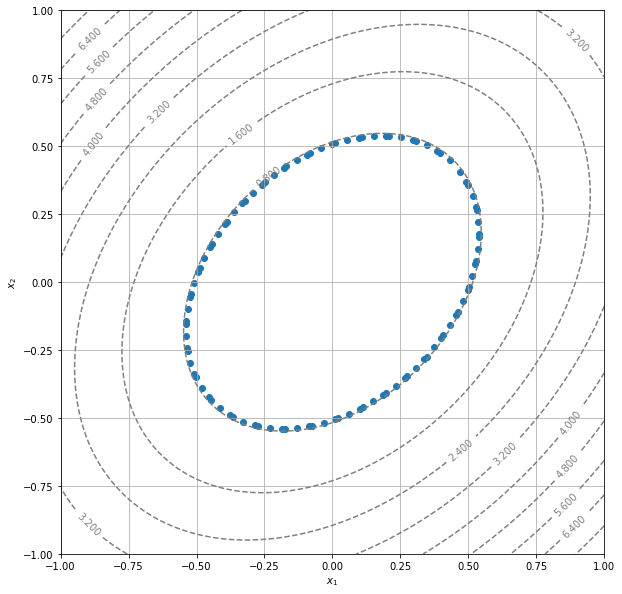

In [94]:
display_contour(f1,
                x=np.linspace(-1.0, 1.0, 100), 
                y=np.linspace(-1.0, 1.0, 100),
                levels=10)



x = level_curve(f1, 0.44, 0.44, delta = 0.01, N = 100, eps = eps)[0]
y = level_curve(f1, 0.44, 0.44, delta = 0.01, N = 100, eps = eps)[1]

plt.scatter(x,y)



### Test de level_curve sur f3

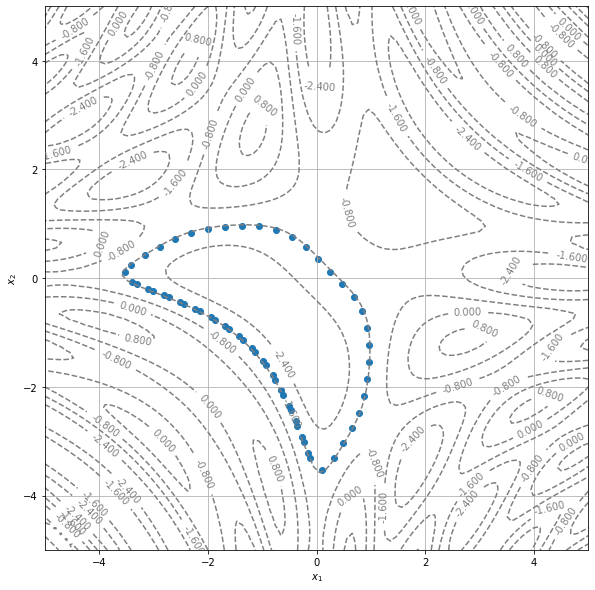

In [6]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

x = level_curve(f3, 0., -3.5, delta = 0.1, N = 60, eps = eps)[0]
y = level_curve(f3, 0., -3.5, delta = 0.1, N = 60, eps = eps)[1]

plt.scatter(x,y)

### Test de level_curve sur f2

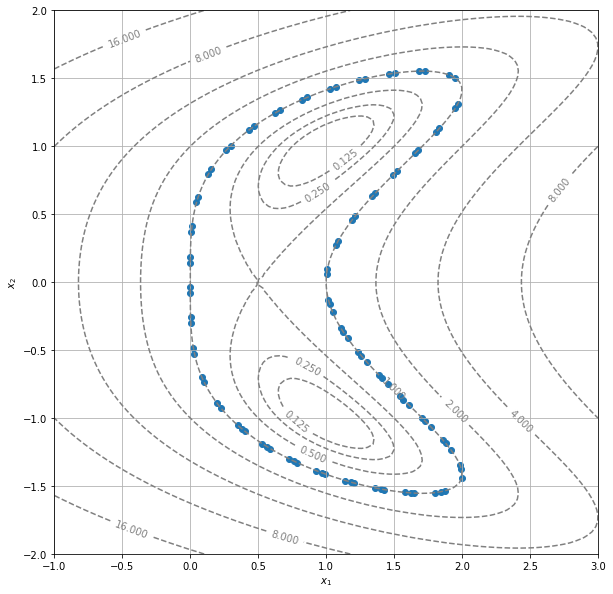

In [7]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)


x = level_curve(f2, 1., 0., delta = 0.05, N = 100, eps = eps)[0]
y = level_curve(f2, 1., 0., delta = 0.05, N = 100, eps = eps)[1]

plt.scatter(x,y)

### Limite du programme

[0.75296764 1.04044071 1.34650633 1.66216742 1.57464309 1.34896581
 1.11399422 0.88214701 0.66236564 0.46802425 0.66236564 0.46802425
 0.66236564 0.46802425 0.66236564 0.46802425 0.66236564 0.46802425
 0.66236564 0.46802425 0.66236564 0.46802425 0.66236564 0.46802425
 0.66236564 0.46802425 0.66236564 0.46802425 0.66236564 0.46802425] [ 1.18975608  1.32151054  1.40103308  1.38211017  1.07823603  0.85671906
  0.64508647  0.43003562  0.20266774 -0.04679453  0.20266774 -0.04679453
  0.20266774 -0.04679453  0.20266774 -0.04679453  0.20266774 -0.04679453
  0.20266774 -0.04679453  0.20266774 -0.04679453  0.20266774 -0.04679453
  0.20266774 -0.04679453  0.20266774 -0.04679453  0.20266774 -0.04679453]


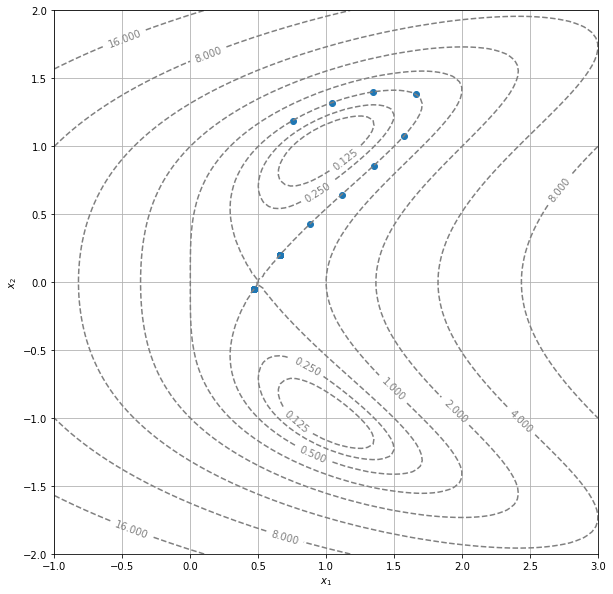

In [8]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)


x = level_curve(f2, 0.5, 1., delta = 0.1, N = 30, eps = eps)[0]
y = level_curve(f2, 0.5, 1., delta = 0.1, N = 30, eps = eps)[1]

print(x,y)
plt.scatter(x,y)

On remarque grâce à la courbe et aux coordonnées des points trouvés qu'au niveau du croisement, le programme va faire des aller-retour entre les deux derniers points. Il est donc incapable de faire toute la ligne de niveau. 

### Question 7

On choisit de tester l'intersection avec le premier segment seulement pour que cela puisse fonctionner pour les courbes auto-intersectantes (comme le cas de Rosenbrock)


On considere que les segments se croisent lorsque le premier point se trouve dans le rectangle formé par le dernier point et celui que l'ont veut rajouter. 


Sur le dessin, les points bleus sont ceux qui ont deja ete placés et le rouge celui que l'on test.

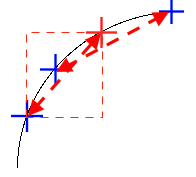

### Tache 4

In [49]:
def level_curve2(f, x0, y0, delta=0.01, N = 100 , eps = eps):
    c = f(x0,y0)
    rot = np.array([[0,1],[-1,0]])
    gradf = grad(f)
    coord = np.zeros((2,N), dtype = float)

    for i in range(N):
        def g (x,y):
            g1 = f(x,y) - c
            g2= (x - x0)**2 + (y - y0)**2 - delta
            return np.array([g1,g2])
        
    

        gradient = gradf(x0,y0)
        tan = np.dot(rot,gradient)
        tandelt = delta * (tan/np.linalg.norm(tan))
        xint, yint = np.array(x0+tandelt[0]), np.array(y0 + tandelt[1])
        x,y = Newton(g,xint,yint,eps,N)
        coord[0][i], coord[1][i] = x, y
        x0, y0 = x, y
        
        # condition d'intersection
        max_abs = max(x,coord[0,i-1])
        min_abs = min(x,coord[0,i-1])
        max_ord = max(y,coord[1,i-1])
        min_ord = min(y,coord[1,i-1])
        
        if min_abs < coord[0,0] < max_abs and min_ord < coord[1,0] < max_ord:
            coord_fin = coord[:i,:i]
            return coord_fin
      
            
    return coord



### Tache 5

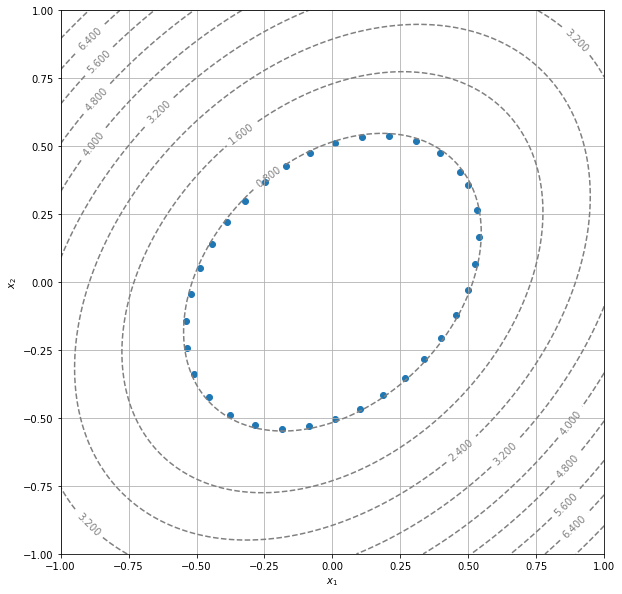

In [50]:
display_contour(f1,
                x=np.linspace(-1.0, 1.0, 100), 
                y=np.linspace(-1.0, 1.0, 100),
                levels=10)



x = level_curve2(f1, 0.44, 0.44, delta = 0.01, N = 100, eps = eps)[0]
y = level_curve2(f1, 0.44, 0.44, delta = 0.01, N = 100, eps = eps)[1]

plt.scatter(x,y)



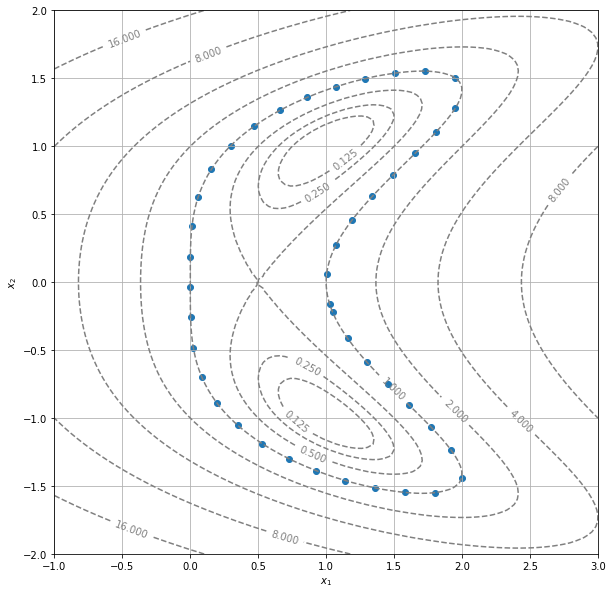

In [51]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)


x = level_curve2(f2, 1., 0., delta = 0.05, N = 100, eps = eps)[0]
y = level_curve2(f2, 1., 0., delta = 0.05, N = 100, eps = eps)[1]

plt.scatter(x,y)

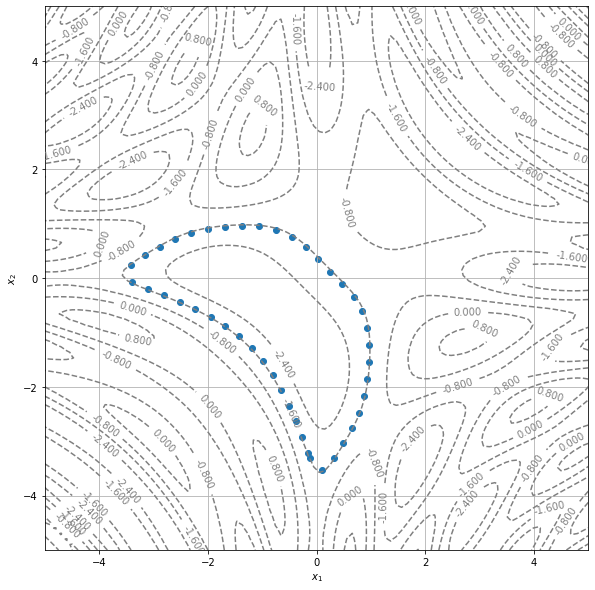

In [52]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

x = level_curve2(f3, 0., -3.5, delta = 0.1, N = 60, eps = eps)[0]
y = level_curve2(f3, 0., -3.5, delta = 0.1, N = 60, eps = eps)[1]

plt.scatter(x,y)

### Question 8

Notons $P_{1} = (p_{11}, p_{12}) ; P_{2} = (p_{21}, p_{22}) ; u_{1} = (u_{11}, u_{12}); u_{2} = (u_{21}, u_{22})$.

On peut calculer $\gamma'(t) = \begin{pmatrix} b+2ct \\ e+2ft \end{pmatrix}$, puis en évaluant $\gamma$ et $\gamma'$ en 0 et 1 ($\gamma'(0) = \alpha * u_{1}$ et $\gamma'(1) = \beta * u_{2}$ où $\alpha > 0, \beta >0$), on trouve un système d'équation :

$$
a = p_{11} \\
d = p_{12} \\
a+b+c = p_{21} \\
d+e+f = p_{22} \\
b = \alpha * u_{11} \\
e= \alpha * u_{12} \\
b+2c = \beta*u_{21} \\
e+2f = \beta*u_{22} \\
$$
Après plusieurs manipulations on obtient :
$$
\alpha = \frac{\frac{2*(p_{21}-p_{11})}{u_{21}}-\frac{2*(p_{22}-p_{12})}{u_{22}}}{\frac{u_{11}}{u_{21}}-\frac{u_{12}}{u_{22}}}
$$
On voit que pour que $\alpha$ soit bien défini, il faut que les composantes de $u_{2}$ soient non nulles et que $u_{1}$ et $u_{2}$ soient non colinéaires (ce qu'on peut voir de facon plus explicite puisque ce coefficient peut etre exprimé comme un quotient de deux determinants).
En exprimant plutôt $\beta$, on trouve que les composantes de $u_{1}$ soient non nulles.

### Tache 6

In [53]:
def gamma(t,P1,P2,u1,u2):
    x1 = P1[0]
    y1 = P1[1]
    x2 = P2[0]
    y2 = P2[1]
    u1x = u1[0]
    u1y = u1[1]
    u2x = u2[0]
    u2y = u2[1]
    det1 = u1x*u2y - u2x*u1y
    det2 = u2y*(x2-x1) - u2x*(y2-y1)
   
    
    if det1 == 0 or det2 == 0:
        xt = (x2 - x1)*t + x1
        yt = (y2 - y1)*t + y1
        gam = np.array([xt,yt])
        return gam
        
    else:
        alpha = (2*det2) / det1
        a = x1
        b = alpha * u1x
        c = x2 - x1 - alpha*u1x
        d = y1
        e = alpha*u1y
        f = y2 - y1 - alpha*u1y
        xt = a + b*t + c*(t**2)
        yt = d + e*t + f*(t**2)
        
        gam = np.array([xt,yt])
        
        return gam

### Test de gamma n1

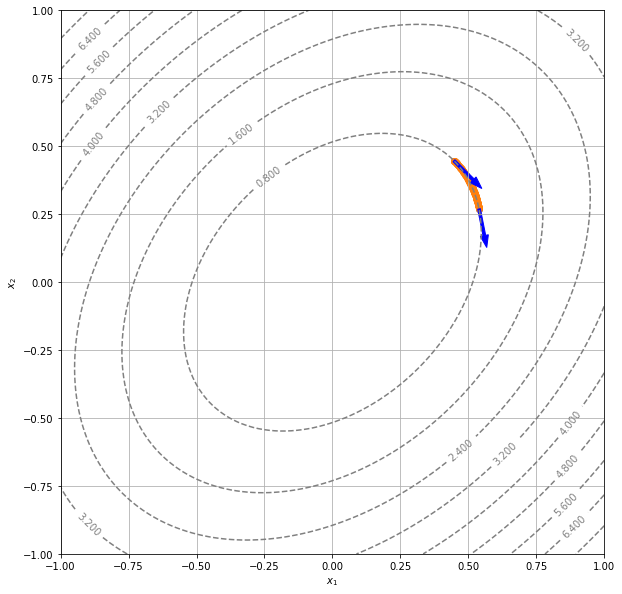

In [43]:
display_contour(f1,
                x=np.linspace(-1, 1.0, 100), 
                y=np.linspace(-1, 1.0, 100),
                levels=10)

def gtask6 (x1, x2):
    g1 = f1(x1,x2) - 0.8
    g2 = x1 - 2*x2
    return np.array([g1, g2])

x,y = Newton(gtask2, 0.44, 0.44, eps, N)
x1,y1 = Newton(gtask6, 0.8, 0.8, eps, N)
plt.scatter(x,y, s= None, c = "r")
plt.scatter(x1,y1)
P1 = np.array([x,y])
P2 = np.array([x1,y1])
t = np.linspace(0,1,100)
rot = np.array([[0,1],[-1,0]])
gradient1 = grad(f1)(x,y)
tan1 = np.dot(rot,gradient1)
u1 = (tan1/np.linalg.norm(tan1))

gradient2 = grad(f1)(x1,y1)
tan2 = np.dot(rot,gradient2)
u2 = (tan2/np.linalg.norm(tan2))


gam = gamma(t,P1,P2,u1,u2)
plt.scatter(gam[0],gam[1])

## on trace u1 et u2
delta = 0.1
norm1 = u1*delta
plt.arrow(P1[0],P1[1], norm1[0],norm1[1], width = 0.01, shape = 'full', color = 'b')

norm2 = u2*delta
plt.arrow(P2[0],P2[1], norm2[0],norm2[1], width = 0.01, shape = 'full', color = 'b')



### Test de gamma sur f1

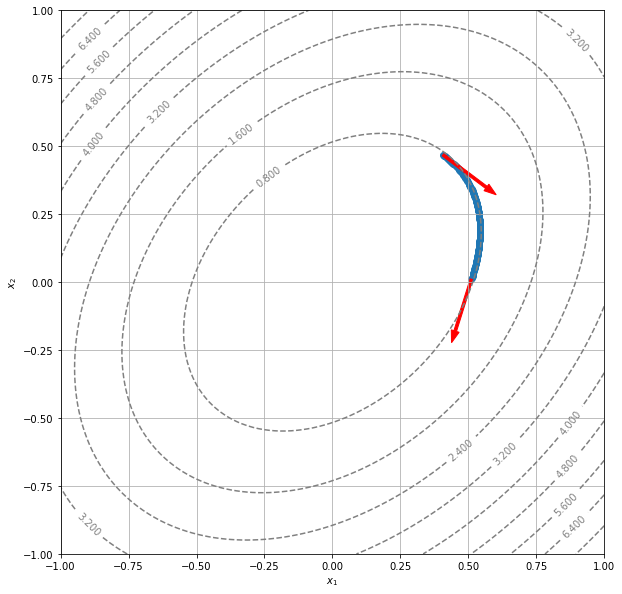

In [40]:
display_contour(f1,
                x=np.linspace(-1, 1.0, 100), 
                y=np.linspace(-1, 1.0, 100),
                levels=10)

x = level_curve2(f1, 0.44, 0.44, delta = 0.01, N = 100, eps = eps)[0]
y = level_curve2(f1, 0.44, 0.44, delta = 0.01, N = 100, eps = eps)[1]

t = np.linspace(0,1,100)

P1 = np.array([x[-1],y[-1]])
P2 = np.array([x[-6],y[-6]])

rot = np.array([[0,1],[-1,0]])
gradient1 = grad(f1)(P1[0],P1[1])
tan1 = np.dot(rot,gradient1)
u1 = (tan1/np.linalg.norm(tan1))

gradient2 = grad(f1)(P2[0],P2[1])
tan2 = np.dot(rot,gradient2)
u2 = (tan2/np.linalg.norm(tan2))

gam = gamma(t,P1,P2,u1,u2)

plt.scatter(gam[0],gam[1])

delta = 0.2
norm1 = u1*delta
plt.arrow(P1[0],P1[1], norm1[0],norm1[1],width = 0.01,  shape = 'full', color = 'r')

norm2 = u2*delta
plt.arrow(P2[0],P2[1], norm2[0],norm2[1], width = 0.01, shape = 'full', color = 'r')

### Test de gamma sur f3

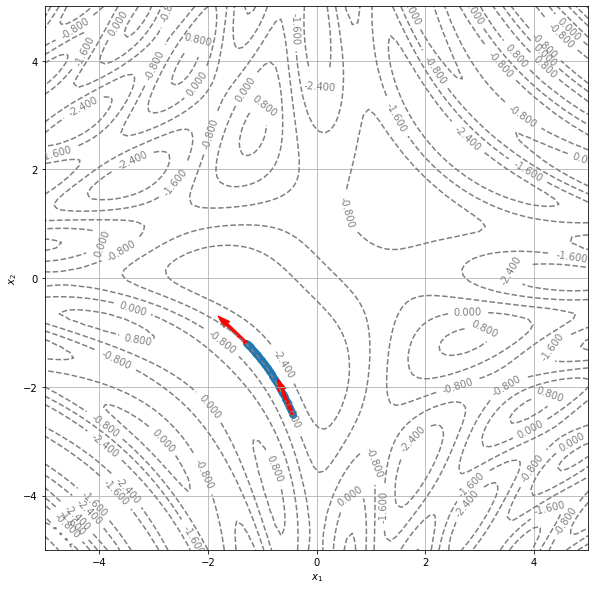

In [41]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)




x = level_curve2(f3, 0., -3.5, delta = 0.1, N = 40, eps = eps)[0]
y = level_curve2(f3, 0., -3.5, delta = 0.1, N = 40, eps = eps)[1]

t = np.linspace(0,1,100)

P1 = np.array([x[-1],y[-1]])
P2 = np.array([x[-6],y[-6]])

rot = np.array([[0,1],[-1,0]])
gradient1 = grad(f3)(P1[0],P1[1])
tan1 = np.dot(rot,gradient1)
u1 = (tan1/np.linalg.norm(tan1))

gradient2 = grad(f3)(P2[0],P2[1])
tan2 = np.dot(rot,gradient2)
u2 = (tan2/np.linalg.norm(tan2))

gam = gamma(t,P1,P2,u1,u2)

plt.scatter(gam[0],gam[1])

delta = 0.5
norm1 = u1*delta
plt.arrow(P1[0],P1[1], norm1[0],norm1[1],width = 0.05,  shape = 'full', color = 'r')

norm2 = u2*delta
plt.arrow(P2[0],P2[1], norm2[0],norm2[1], width = 0.05, shape = 'full', color = 'r')

### Test de gamma sur f2 

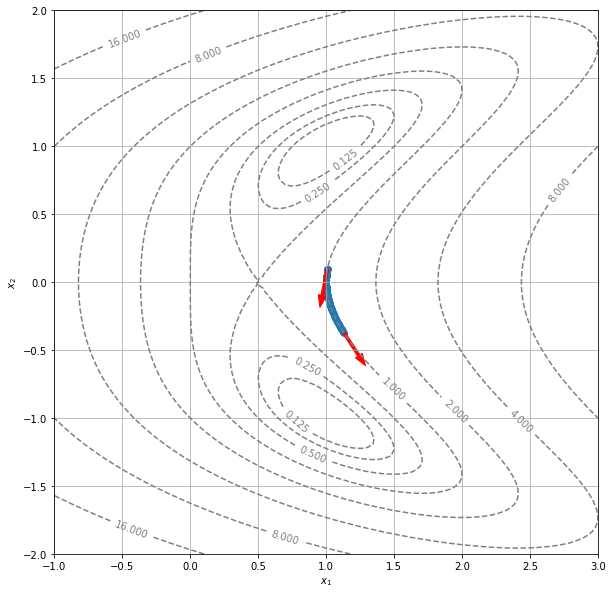

In [42]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)



x = level_curve2(f2, 1., 0., delta = 0.01, N = 100, eps = eps)[0]
y = level_curve2(f2, 1., 0., delta = 0.01, N = 100, eps = eps)[1]

t = np.linspace(0,1,100)

P1 = np.array([x[-1],y[-1]])
P2 = np.array([x[-6],y[-6]])

rot = np.array([[0,1],[-1,0]])
gradient1 = grad(f2)(P1[0],P1[1])
tan1 = np.dot(rot,gradient1)
u1 = (tan1/np.linalg.norm(tan1))

gradient2 = grad(f2)(P2[0],P2[1])
tan2 = np.dot(rot,gradient2)
u2 = (tan2/np.linalg.norm(tan2))

gam = gamma(t,P1,P2,u1,u2)

plt.scatter(gam[0],gam[1])

delta = 0.2
norm1 = u1*delta
plt.arrow(P1[0],P1[1], norm1[0],norm1[1],width = 0.02,  shape = 'full', color = 'r')

norm2 = u2*delta
plt.arrow(P2[0],P2[1], norm2[0],norm2[1], width = 0.02, shape = 'full', color = 'r')

### Tache 7

In [82]:
def level_curve3(f, x0, y0,oversampling, delta=0.01, N = 100 , eps = eps):
    c = f(x0,y0)
    rot = np.array([[0,1],[-1,0]])
    gradf = grad(f)
    coord = np.zeros((2,N), dtype = float)
    oversamp_x = []
    oversamp_y = []
    
    for i in range(N):
        def g (x,y):
            g1 = f(x,y) - c
            g2= (x - x0)**2 + (y - y0)**2 - delta
            return np.array([g1,g2])
        
    

        gradient = gradf(x0,y0)
        tan = np.dot(rot,gradient)
        tandelt = delta * (tan/np.linalg.norm(tan))
        xint, yint = np.array(x0+tandelt[0]), np.array(y0 + tandelt[1])
        x,y = Newton(g,xint,yint,eps,N)
        coord[0][i], coord[1][i] = x, y
        x0, y0 = x, y
        
        if oversampling > 1:
            if i != 0:
                t = np.linspace(0,1,oversampling-1)
                P1 = np.array([x,y])
                P2 = np.array([coord[0][i-1],coord[1][i-1]])
                
                gradient1 = grad(f)(P1[0],P1[1])
                tan1 = np.dot(rot,gradient1)
                u1 = (tan1/np.linalg.norm(tan1))
                
                gradient2 = grad(f)(P2[0],P2[1])
                tan2 = np.dot(rot,gradient2)
                u2 = (tan2/np.linalg.norm(tan2))
                
                # decommenter le paragraphe suivant pour voir les fleches des points de depart
                #delta = 0.2
                #norm1 = u1*delta
                #plt.arrow(P1[0],P1[1], norm1[0],norm1[1],width = 0.01,  shape = 'full', color = 'b')
                #norm2 = u2*delta
                #plt.arrow(P2[0],P2[1], norm2[0],norm2[1], width = 0.01, shape = 'full', color = 'b')
               
                abscisse , ordo  = gamma(t,P1,P2,u1,u2)[0], gamma(t,P1,P2,u1,u2)[1]
                for j in range(len(ordo)):
                    oversamp_x.append(abscisse[j])
                    oversamp_y.append(ordo[j])
                
                
        
        # condition d'intersection
        max_abs = max(x,coord[0,i-1])
        min_abs = min(x,coord[0,i-1])
        max_ord = max(y,coord[1,i-1])
        min_ord = min(y,coord[1,i-1])
        
        if min_abs < coord[0,0] < max_abs and min_ord < coord[1,0] < max_ord:
            coord_fin = coord[:i,:i]
            return coord_fin, oversamp_x, oversamp_y
        
      
            
    return coord, oversamp_x, oversamp_y

### Tache 8

### Test final sur f1

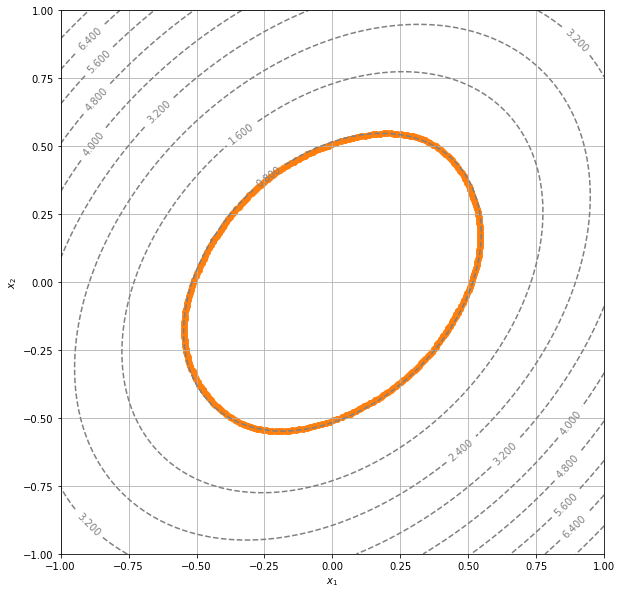

In [84]:
display_contour(f1,
                x=np.linspace(-1.0, 1.0, 100), 
                y=np.linspace(-1.0, 1.0, 100),
                levels=10)



coord = level_curve3(f1, 0.44, 0.44, oversampling = 50, delta = 0.3, N = 20, eps = eps)[0]
x = level_curve3(f1, 0.44, 0.44, oversampling = 50, delta = 0.3, N = 20, eps = eps)[1]
y = level_curve3(f1, 0.44, 0.44, oversampling = 50, delta = 0.3, N = 20, eps = eps)[2]

x0 = coord[0]
y0 = coord[1]

plt.scatter(x0,y0)
plt.scatter(x,y)



### Test final sur f3

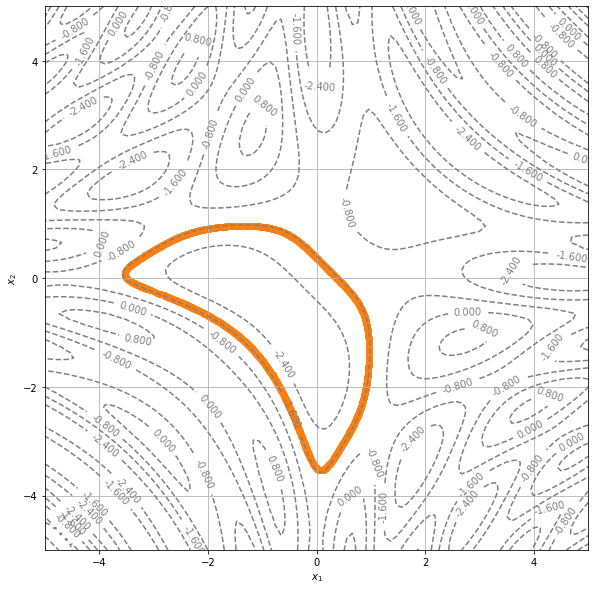

In [92]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)




coord = level_curve3(f3, 0., -3.5, oversampling = 30, delta = 0.1, N = 50, eps = eps)[0]
x = level_curve3(f3, 0., -3.5, oversampling = 30, delta = 0.1, N = 50, eps = eps)[1]
y = level_curve3(f3, 0., -3.5, oversampling = 30, delta = 0.1, N = 50, eps = eps)[2]

x0 = coord[0]
y0 = coord[1]

plt.scatter(x0,y0)
plt.scatter(x,y)

### Test final sur f2

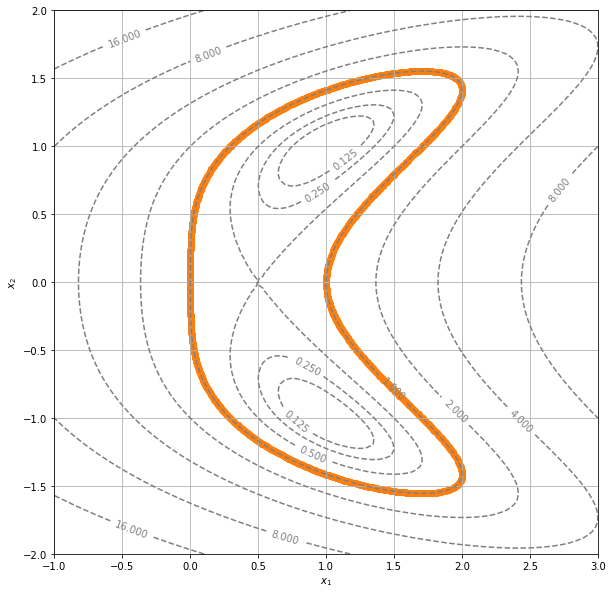

In [90]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)


coord = level_curve3(f2, 1., 0., oversampling = 30, delta = 0.05, N = 50, eps = eps)[0]
x = level_curve3(f2, 1., 0., oversampling = 30, delta = 0.05, N = 50, eps = eps)[1]
y = level_curve3(f2, 1., 0., oversampling = 30, delta = 0.05, N = 50, eps = eps)[2]

x0 = coord[0]
y0 = coord[1]

plt.scatter(x0,y0)
plt.scatter(x,y)
